In [1]:
import numpy as np

data_folder = "../dataset/neuralmetric/testing_results_nnmetric"

## load data for NNMetric
NNMetric_data0 = np.load(data_folder+"/test_crash_data_NNMetric.npy")
NNMetric_data1 = np.tile(np.load(data_folder+"/test_safe_data_NNMetric.npy"), 58)
print(NNMetric_data0.shape, NNMetric_data1.shape)
NNMetric_data = np.concatenate((NNMetric_data0, NNMetric_data1), axis=0)
print(NNMetric_data.shape)

data_folder = "../dataset/neuralmetric/testing_results_others"

## load data for SMAR
SMAR_data0 = np.load(data_folder+"/test_crash_data_SMAR.npy")
SMAR_data1 = np.tile(np.load(data_folder+"/test_safe_data_SMAR.npy"), 58)
print(SMAR_data0.shape, SMAR_data1.shape)
SMAR_data = np.concatenate((SMAR_data0, SMAR_data1), axis=0)
print(SMAR_data.shape)

## load data for PCM
PCM_data0 = np.load(data_folder+"/test_crash_data_PCM.npy")
PCM_data1 = np.tile(np.load(data_folder+"/test_safe_data_PCM.npy"), 58)
print(PCM_data0.shape, PCM_data1.shape)
PCM_data = np.concatenate((PCM_data0, PCM_data1), axis=0)
print(PCM_data.shape)

## load data for TTC
TTC_data0 = -np.load(data_folder+"/test_crash_data_TTC.npy")
TTC_data1 = -np.tile(np.load(data_folder+"/test_safe_data_TTC.npy"), 58)
print(TTC_data0.shape, TTC_data1.shape)
TTC_data = np.concatenate((TTC_data0, TTC_data1), axis=0)
print(TTC_data.shape)

## load data for MPrISM
MPrISM_data0 = -np.load(data_folder+"/test_crash_data_MPrISM.npy")
MPrISM_data1 = -np.tile(np.load(data_folder+"/test_safe_data_MPrISM.npy"), 58)
print(MPrISM_data0.shape, MPrISM_data1.shape)
MPrISM_data = np.concatenate((MPrISM_data0, MPrISM_data1), axis=0)
print(MPrISM_data.shape)

## load data for ground truth
GT_data0 = np.load(data_folder+"/test_crash_data_gt.npy")
GT_data1 = np.tile(np.load(data_folder+"/test_safe_data_gt.npy"), 58)
print(GT_data0.shape, GT_data1.shape)
GT_data = np.concatenate((GT_data0, GT_data1), axis=0)
print(GT_data.shape)




(18504,) (7321688,)
(7340192,)
(18504,) (7321688,)
(7340192,)
(18504,) (7321688,)
(7340192,)
(18504,) (7321688,)
(7340192,)
(18504,) (7321688,)
(7340192,)
(18504,) (7321688,)
(7340192,)


In [2]:
import sklearn.metrics
pr_NNMetric, rc_NNMetric, pr_thresholds_NNMetric = sklearn.metrics.precision_recall_curve(GT_data, NNMetric_data)
pr_NNMetric = pr_NNMetric[1:-1]
rc_NNMetric = rc_NNMetric[1:-1]
pr_thresholds_NNMetric = pr_thresholds_NNMetric[1:-1]
pr_SMAR, rc_SMAR, pr_thresholds_SMAR = sklearn.metrics.precision_recall_curve(GT_data, SMAR_data)
pr_SMAR = pr_SMAR[1:-1]
rc_SMAR = rc_SMAR[1:-1]
pr_thresholds_SMAR = pr_thresholds_SMAR[1:-1]
pr_PCM, rc_PCM, pr_thresholds_PCM = sklearn.metrics.precision_recall_curve(GT_data, PCM_data)
pr_PCM = pr_PCM[1:-1]
rc_PCM = rc_PCM[1:-1]
pr_thresholds_PCM = pr_thresholds_PCM[1:-1]
pr_TTC, rc_TTC, pr_thresholds_TTC = sklearn.metrics.precision_recall_curve(GT_data, TTC_data)
pr_TTC = pr_TTC[1:-1]
rc_TTC = rc_TTC[1:-1]
pr_thresholds_TTC = pr_thresholds_TTC[1:-1]
pr_MPrISM, rc_MPrISM, pr_thresholds_MPrISM = sklearn.metrics.precision_recall_curve(GT_data, MPrISM_data)
pr_MPrISM = pr_MPrISM[1:-1]
rc_MPrISM = rc_MPrISM[1:-1]
pr_thresholds_MPrISM = pr_thresholds_MPrISM[1:-1]

In [3]:
import sklearn.metrics
fpr_NNMetric, tpr_NNMetric, _ = sklearn.metrics.roc_curve(GT_data, NNMetric_data)
auc_NNMetric = sklearn.metrics.roc_auc_score(GT_data, NNMetric_data)

fpr_SMAR, tpr_SMAR, _ = sklearn.metrics.roc_curve(GT_data, SMAR_data)
auc_SMAR = sklearn.metrics.roc_auc_score(GT_data, SMAR_data)

fpr_PCM, tpr_PCM, _ = sklearn.metrics.roc_curve(GT_data, PCM_data)
auc_PCM = sklearn.metrics.roc_auc_score(GT_data, PCM_data)

fpr_TTC, tpr_TTC, _ = sklearn.metrics.roc_curve(GT_data, TTC_data)
auc_TTC = sklearn.metrics.roc_auc_score(GT_data, TTC_data)

fpr_MPrISM, tpr_MPrISM, _ = sklearn.metrics.roc_curve(GT_data, MPrISM_data)
auc_MPrISM = sklearn.metrics.roc_auc_score(GT_data, MPrISM_data)



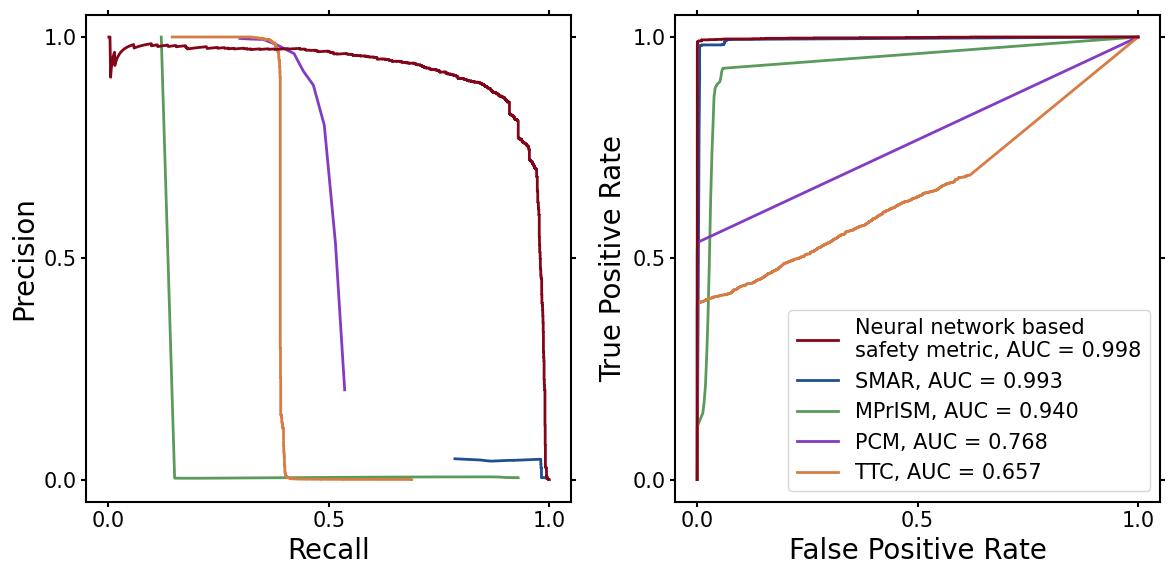

In [4]:
import matplotlib
import matplotlib.pyplot as plt
color_nnmetric = (131/255,5/255,24/255)
color_mprism = "#5A9B5A"
color_ttc = "#D67D45"
color_darkpink = "#AA3867"
color_pcm = "#843BC3"
color_smar = "#204F91"
font = {'size': 15}
plt.rc('font', **font)

# PR curve plot
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].plot(rc_NNMetric, pr_NNMetric, label="NN Metric", linewidth=2, zorder=10, color=color_nnmetric)
axes[0].plot(rc_SMAR, pr_SMAR, label="SMAR", linewidth=2, color=color_smar)
axes[0].plot(rc_MPrISM, pr_MPrISM, label="MPrISM", linewidth=2, color=color_mprism)
axes[0].plot(rc_PCM, pr_PCM, label="PCM", linewidth=2, color=color_pcm)
axes[0].plot(rc_TTC, pr_TTC, label="TTC", linewidth=2, color=color_ttc)
axes[0].set_xlabel("Recall",fontsize=20)
axes[0].set_ylabel("Precision",fontsize=20)
axes[0].set_xlim((-0.05,1.05))
axes[0].set_ylim((-0.05,1.05))
axes[0].set_xticks([0,0.5,1])
axes[0].set_yticks([0,0.5,1])
for d in ['top','bottom','left','right']:
    axes[0].spines[d].set_linewidth(1.5)
axes[0].tick_params(width=1.5)
axes[0].tick_params(top='on', bottom='on', left='on', right='on')

axes[1].plot(fpr_NNMetric, tpr_NNMetric, label="Neural network based\nsafety metric, AUC = {:.3f}".format(auc_NNMetric), linewidth=2, color=color_nnmetric, zorder=10, clip_on=False)
axes[1].plot(fpr_SMAR, tpr_SMAR, label="SMAR, AUC = {:.3f}".format(auc_SMAR), linewidth=2, color=color_smar)
axes[1].plot(fpr_MPrISM, tpr_MPrISM, label="MPrISM, AUC = {:.3f}".format(auc_MPrISM), linewidth=2, color=color_mprism)
axes[1].plot(fpr_PCM, tpr_PCM, label="PCM, AUC = {:.3f}".format(auc_PCM), linewidth=2, color=color_pcm)
axes[1].plot(fpr_TTC, tpr_TTC, label="TTC, AUC = {:.3f}".format(auc_TTC), linewidth=2, color=color_ttc)
axes[1].legend(loc='lower right')
axes[1].set_xlabel("False Positive Rate",fontsize=20)
axes[1].set_ylabel("True Positive Rate",fontsize=20)
axes[1].set_xlim((-0.05,1.05))
axes[1].set_ylim((-0.05,1.05))
axes[1].set_xticks([0,0.5,1])
axes[1].set_yticks([0,0.5,1])
for d in ['top','bottom','left','right']:
    axes[1].spines[d].set_linewidth(1.5)
axes[1].tick_params(width=1.5)
axes[1].tick_params(top='on', bottom='on', left='on', right='on')

plt.tight_layout()

plt.savefig("pr_roc_curve.png", dpi=300)
